<a href="https://colab.research.google.com/github/ArtDz12/Paydot/blob/main/LSTM_(yang_bener).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proses Penginstallan Library**

In [ ]:
import math
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, YearLocator

Pengambilan data saham JKSE melalui Yahoo.finance.com dengan *range* waktu 5 tahun **bold text**

# Input data

In [ ]:
datastock =pd.read_csv('jkse16.csv')
datastock

In [ ]:
datastock = datastock.drop(['Open','Low','High','Adj Close','Volume'], axis = 'columns')

In [ ]:
datastock
datastock.shape

Pengecekan jumlah data pada harga penutupan saham JKSE

In [ ]:
datastock.count()

**Pengecekan nilai null pada dataset**

In [ ]:
datastock.isnull().sum()


Date      0
Close    49
dtype: int64

#Imputasi
Imputasi pertama menggunakan imputasi **average**, **nilai kosong** pada data **df** akan digantikan dengan nilai rata-rata setiap kolom.

Imputasi kedua menggunakan imputasi **most common occurence**, imputasi ini digunakan untuk mengisi data kosong pada variabel kategorikal dengan nilai kategori yang paling sering muncul.

Setelah itu akan dicek kembali apakah masih terdapat **data kosong**.

In [ ]:
datastock.reset_index(drop=True, inplace=True)
datastock['Close'] = pd.to_numeric(datastock['Close'], errors='coerce')
datastock.fillna(datastock['Close'].mean(), inplace=True)
datastock.head()

,Date,Close
0,2016-01-04,4525.918945
1,2016-01-05,4557.821777
2,2016-01-06,4608.981934
3,2016-01-07,4530.448242
4,2016-01-08,4546.288086


In [ ]:
datastock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1019 non-null   object 
 1   Close   1019 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [ ]:
datastock

,Date,Close
0,2016-01-04,4525.918945
1,2016-01-05,4557.821777
2,2016-01-06,4608.981934
3,2016-01-07,4530.448242
4,2016-01-08,4546.288086
...,...,...
1014,2019-12-20,6284.372070
1015,2019-12-23,6305.910156
1016,2019-12-26,6319.442871
1017,2019-12-27,6329.313965


Ubah tipe data object ke datetime

# Data Visualisasi

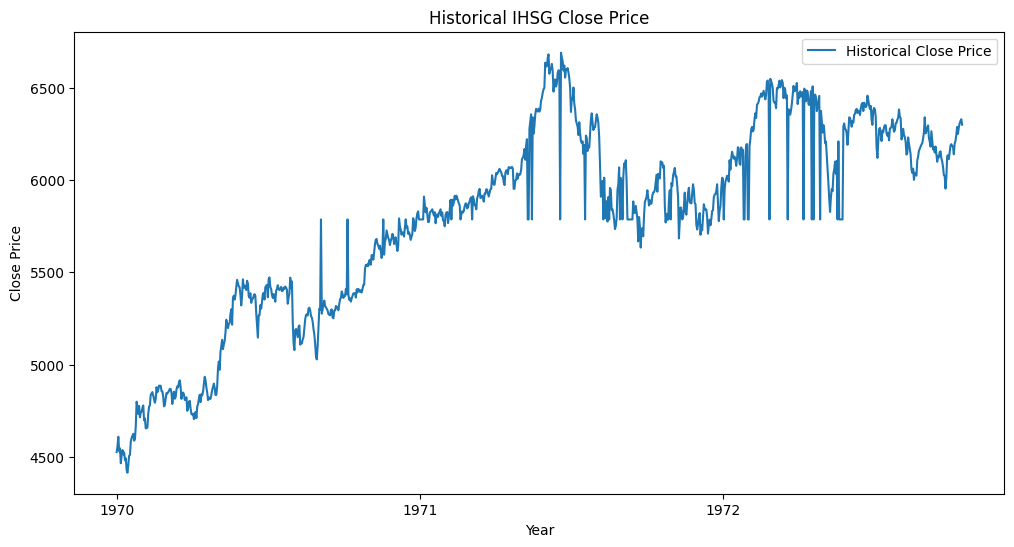

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(datastock['Date'], datastock['Close'], label='Historical Close Price')

# Format x-axis ticks to show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('Historical IHSG Close Price')
plt.legend()
plt.show()

# Normalisasi Data dan Proses Pengubahan tipe data menjadi Numpy Array

In [ ]:
# Mengubah data menjadi tipe numpy array
harga = datastock['Close'].values.reshape(-1, 1)

In [ ]:
# Normalisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(harga)

In [ ]:
def prepare_datastock(datastock, time_steps):
    X, y = [], []
    for i in range(len(datastock) - time_steps - 1):
        X.append(datastock[i:(i + time_steps), 0])
        y.append(datastock[i + time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
time_steps = 20
X, y = prepare_datastock(scaled_data, time_steps)

# Data processing
data splitting (training dan testing), dan data scalling

**Data Splitting (80% training dan 20% testing)**

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Reshaping data agar sesuai dengan input LSTM **

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Data scalling / feature scalling**

# Long Short Term Memory Model

Pada cell ini akan menggunakan ADAM Optimizer, dense layer

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [ ]:
model.compile(optimizer=  Adam (lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=20 , epochs=40)

Epoch 1/40
40/40 [==============================] - 8s 27ms/step - loss: 0.0427
Epoch 2/40
40/40 [==============================] - 1s 27ms/step - loss: 0.0085
Epoch 3/40
40/40 [==============================] - 1s 27ms/step - loss: 0.0072
Epoch 4/40
40/40 [==============================] - 1s 26ms/step - loss: 0.0075
Epoch 5/40
40/40 [==============================] - 1s 27ms/step - loss: 0.0067
Epoch 6/40
40/40 [==============================] - 1s 27ms/step - loss: 0.0080
Epoch 7/40
40/40 [==============================] - 1s 27ms/step - loss: 0.0067
Epoch 8/40
40/40 [==============================] - 1s 27ms/step - loss: 0.0063
Epoch 9/40
40/40 [==============================] - 1s 28ms/step - loss: 0.0062
Epoch 10/40
40/40 [==============================] - 2s 39ms/step - loss: 0.0060
Epoch 11/40
40/40 [==============================] - 2s 40ms/step - loss: 0.0058
Epoch 12/40
40/40 [==============================] - 1s 29ms/step - loss: 0.0061
Epoch 13/40
40/40 [==================

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse = np.sqrt(np.mean(predicted_stock_price - y_test)**2)
rmse

7/7 [==============================] - 1s 8ms/step


4.813220968864366

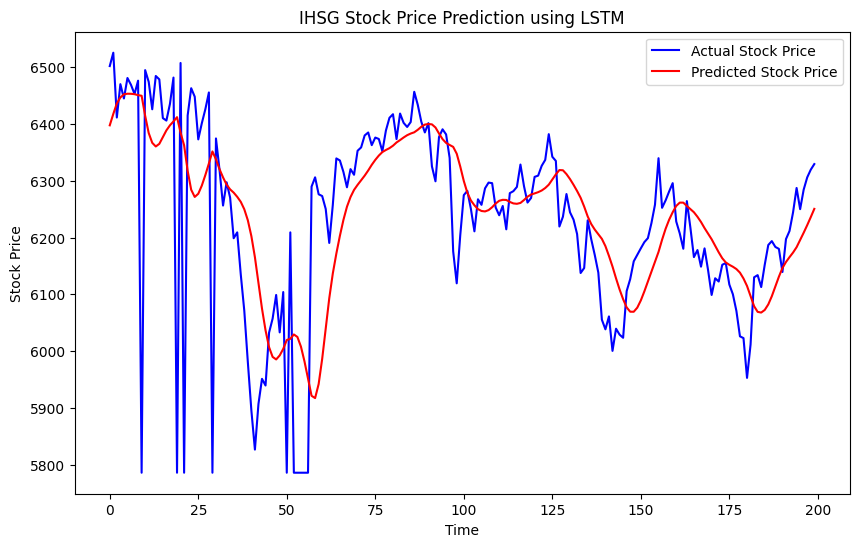

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('IHSG Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()